# Tibetan Readability – A Python Project
## 1 Introduction

<p>Tibetan has a literary tradition stretching back to the Tibetan Empire of the 7th through 11th centuries CE. In this period, an alphabet was developed under the auspices of the State to officially translate the vast canon of Indian Buddhist literature from Sanskrit into Tibetan. Historical standards in spelling and grammar were codified in the texts of the day, and these texts provided the standards that define 'proper' language use in writing. However, the language maintenece enacted by the Empire—the updating of spellings to reflect current pronunciation, and of vocabulary to reflect current usage—ended with its fall 1,000 years ago. To this day, it is not any modern language variety, but these historical documents that determine 'proper' spelling and grammar for Tibetan. 
    
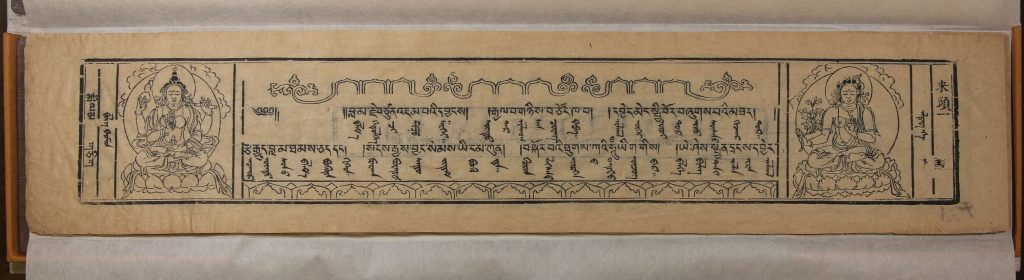
    
<p>This has led to a linguistic situation called 'diglossia': where two distinct forms of a language are used by a single language community, one that is historical and prestigious, and another that is the common spoken vernacular. As the natural, everyday speech varieties of Tibetan communities have continued evolving and changing, the differences and inconsistencies between them and the frozen written standard have continued to mount. These differences have a measurable impact on early literacy for both children and second language learners, as there are fewer transparent connections between your natural mother tongue and the words on the page. 

<p>In this project, we will use Python to perform some basic corpus analysis on a corpus of Tibetan children's speech. This data is key to early literacy, because it will tell us what words children use—words children use are words they know!—and which ones they know well. Frequency, for example, has been used as a measure of word difficulty since the early days of 'readability'—the science of determining whether or not a text is easy to read. By importing a speech corpus, and finding the frequency rates of vocabulary, we can then 'grade' children's stories by level, by comparing their vocabulary against our reference corpus. 

    

## 2 Import statements

Put your import statements at the top! Import **requests** to pull our corpus data from the web; import **pandas** to manipulate the data:

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import requests
import os
import matplotlib

## 3 Viewing raw text data locally

Define a function, **local_raw_text**, that opens files and imports corpus data as raw text from your local drive. Test the function on the first file, **M0001.txt**, and return the raw text as the variable **local_M0001_text**.

In [191]:
def local_raw_text(location):
    f=open(location,'r',encoding="utf-8")
    text=f.read()
    return text

local_M0001_text=local_raw_text('D:\Corpora\Tibetan Corpora\Childrens-Speech\Spaced\M0001.txt')
print(local_M0001_text)

 
སྔོན་མ ཡོད་བ ། རྨོ་མོ གཅིག ཡོད་རེད་ད ར ། རྨོ་མོ དེ ལམ་ཁ ལ འགྲོ བསྡད ཡོད་རེད་ད ། 
 
མ་རེད ། རྨོ་མོ དེ ལམ་ཁ ལ འགྲོ བསྡད ཡོད་རེད་ད ར ། ཨ་ནས རྨོ་མོ ད འ 
 
སྤེའུ གཅིག ཐུག རེད་ད ར ཤིང་སྡོང སྒང་ལ ། ཨ་ནས ཨ་ཅག གཅིག ད རྨོ་མོ 
 
ཨ་ཅག དེ ད ཨ་མ འགྲོ བསྡད ཡོད་རེད་ད ར ། ཨ་ནས ཨ་ཅག དེ ད རྨོ་མོ དེ ཡོད་བ སྒོ་རྭ ནས དོན ནས ར ། 
 
མི གཅིག ཡོད་རེད་ད ར ། མི དེ 
 
སྣ་ཁུང ལ ཨི་འདྲས བྱས འཇོག གཅིག མི་འདུག་གས ། འོ དེ ཞུས རེད་ད ར ། ཨ་ནས ཡོད་བ ། 
 
མི གཅིག ཡོད་བ ། མི དེས ཡོད་བ ཟ་ཁང ལ རྐུན་མ བརྒྱབ བསྡད ཡོད་རེད་ད ། །  
 
མི དེ ཡོད་བ ། 
 
མི དེ ལྕགས སྒང་ལ རྩེད་མོ རྩེ བསྡད ཡོད་རེད་ད རྐུན་མ བརྒྱབ་པའི རྗེས་ལ ། ཨ་ནས མི གཅིག་པོ ། 
 
མི གཅིག ལ རྐང་པ ལ རྨ བཟོས འཇོག དེ ཨི་འདྲས ཡར སྟོན རེད་ད ར ། ཨ་ནས 
 
ཨེ་མཆི་གིས ག་རེ བྱས སོང ལབ རེད་ད ར ། ཨ་ནས ཁབ བརྒྱབ ཡོད་རེད་ད རྐུབ ལ ། ཨ་ནས 
 
པུ་གུ ཆུང་ཆུང གཅིག ཡོད་རེད་ད ། པུ་གུ ཆུང་ཆུང དེ སྣ་ཁུང ལ དེ 
 
དེ བྱས ནས ནད་པ ཆགས རེད་ད ར ། ཨ་ནས མི གཅིག 
 
མི གཅིག མི གཅིག ཁ་ལག ཟ བསྡད ཡོད་རེད་ད ར ། 
 
ཨ་ནས ཡོད་བ ། ཨ་ནས ཡོད་བ ། 
 
 
 
མི དེ ཡོད་བ ། 
 
རྐང་པ སེན་མོ ཟ རེད་ད ར ། ཨ་ནས མི དེས རྐང་པ སེན་

## 4 Viewing online files
Do the same for importing raw text data from a url. Define the function as **online_raw_text**, and test it on the first file (**M0001.txt**).

In [83]:
def online_raw_text(url):
    r=requests.get(url)
    r.encoding='UTF-8'
    file=r.text
    return file

online_M0001_text = online_raw_text("https://raw.githubusercontent.com/Esukhia/Corpora/master/Childrens-Speech/Spaced/M0001.txt")
print(online_M0001_text)

 
སྔོན་མ ཡོད་བ ། རྨོ་མོ གཅིག ཡོད་རེད་ད ར ། རྨོ་མོ དེ ལམ་ཁ ལ འགྲོ བསྡད ཡོད་རེད་ད ། 
 
མ་རེད ། རྨོ་མོ དེ ལམ་ཁ ལ འགྲོ བསྡད ཡོད་རེད་ད ར ། ཨ་ནས རྨོ་མོ ད འ 
 
སྤེའུ གཅིག ཐུག རེད་ད ར ཤིང་སྡོང སྒང་ལ ། ཨ་ནས ཨ་ཅག གཅིག ད རྨོ་མོ 
 
ཨ་ཅག དེ ད ཨ་མ འགྲོ བསྡད ཡོད་རེད་ད ར ། ཨ་ནས ཨ་ཅག དེ ད རྨོ་མོ དེ ཡོད་བ སྒོ་རྭ ནས དོན ནས ར ། 
 
མི གཅིག ཡོད་རེད་ད ར ། མི དེ 
 
སྣ་ཁུང ལ ཨི་འདྲས བྱས འཇོག གཅིག མི་འདུག་གས ། འོ དེ ཞུས རེད་ད ར ། ཨ་ནས ཡོད་བ ། 
 
མི གཅིག ཡོད་བ ། མི དེས ཡོད་བ ཟ་ཁང ལ རྐུན་མ བརྒྱབ བསྡད ཡོད་རེད་ད ། །  
 
མི དེ ཡོད་བ ། 
 
མི དེ ལྕགས སྒང་ལ རྩེད་མོ རྩེ བསྡད ཡོད་རེད་ད རྐུན་མ བརྒྱབ་པའི རྗེས་ལ ། ཨ་ནས མི གཅིག་པོ ། 
 
མི གཅིག ལ རྐང་པ ལ རྨ བཟོས འཇོག དེ ཨི་འདྲས ཡར སྟོན རེད་ད ར ། ཨ་ནས 
 
ཨེ་མཆི་གིས ག་རེ བྱས སོང ལབ རེད་ད ར ། ཨ་ནས ཁབ བརྒྱབ ཡོད་རེད་ད རྐུབ ལ ། ཨ་ནས 
 
པུ་གུ ཆུང་ཆུང གཅིག ཡོད་རེད་ད ། པུ་གུ ཆུང་ཆུང དེ སྣ་ཁུང ལ དེ 
 
དེ བྱས ནས ནད་པ ཆགས རེད་ད ར ། ཨ་ནས མི གཅིག 
 
མི གཅིག མི གཅིག ཁ་ལག ཟ བསྡད ཡོད་རེད་ད ར ། 
 
ཨ་ནས ཡོད་བ ། ཨ་ནས ཡོད་བ ། 
 
 
 
མི དེ ཡོད་བ ། 
 
རྐང་པ སེན་མོ ཟ རེད་ད ར ། ཨ་ནས མི དེས རྐང་པ སེན་

## 5 Storing local corpus data in dictionaries 

Define a function, **freq_dict_dir()**, that opens files from a local directory and returns a dictionary of words (*keys*) and their corresponding frequencies (*values*) across all the files in that directory. 

Test the function on the content of the folder: **D:\Corpora\Tibetan Corpora\Childrens-Speech\Spaced**, store the data in the variable **freq_dict_spaced**, and return the frequency dictionary.

In [355]:
def freq_dict_file(file):
    freq_dict={}
    f=open(file,'r',encoding='utf-8')
    text=f.read()
    data_list=text.split()
    for word in data_list: 
        if word not in freq_dict:
            freq_dict[word]=1
        else:
            freq_dict[word]+=1
    #freq_dict.pop('\ufeff') # pop out the encoding keyword
    return freq_dict

def freq_dict_dir(directory):
    
    """ freq_dict_dir takes the directory listing and returns a dictionary 
    of all the words in all the text files that directory contains as keys, 
    with their frequency counts across all those files as the value """
    
    freq_dict = {}
    
        f = open(directory + '\\' + file,'r',encoding="utf-8")
        text = f.read()
        data_list = text.split()
        for word in data_list:
            if word not in freq_dict:
                freq_dict[word] = 1
            else:
                freq_dict[word] += 1
    freq_dict.pop('\ufeff') # pop out the encoding keyword
    return freq_dict

freq_dict_spaced = freq_dict_dir('D:\Corpora\Tibetan Corpora\Childrens-Speech\Spaced')
freq_dict_spaced

{'སྔོན་མ': 44,
 'ཡོད་བ': 375,
 '།': 4624,
 'རྨོ་མོ': 26,
 'གཅིག': 571,
 'ཡོད་རེད་ད': 278,
 'ར': 679,
 'དེ': 466,
 'ལམ་ཁ': 11,
 'ལ': 707,
 'འགྲོ': 221,
 'བསྡད': 259,
 'མ་རེད': 92,
 'ཨ་ནས': 1173,
 'ད': 156,
 'འ': 42,
 'སྤེའུ': 19,
 'ཐུག': 11,
 'རེད་ད': 568,
 'ཤིང་སྡོང': 41,
 'སྒང་ལ': 72,
 'ཨ་ཅག': 60,
 'ཨ་མ': 106,
 'སྒོ་རྭ': 1,
 'ནས': 399,
 'དོན': 19,
 'མི': 262,
 'སྣ་ཁུང': 6,
 'ཨི་འདྲས': 117,
 'བྱས': 148,
 'འཇོག': 33,
 'མི་འདུག་གས': 5,
 'འོ': 194,
 'ཞུས': 9,
 'དེས': 41,
 'ཟ་ཁང': 3,
 'རྐུན་མ': 13,
 'བརྒྱབ': 86,
 'ལྕགས': 2,
 'རྩེད་མོ': 101,
 'རྩེ': 37,
 'བརྒྱབ་པའི': 1,
 'རྗེས་ལ': 64,
 'གཅིག་པོ': 19,
 'རྐང་པ': 58,
 'རྨ': 17,
 'བཟོས': 44,
 'ཡར': 26,
 'སྟོན': 17,
 'ཨེ་མཆི་གིས': 1,
 'ག་རེ': 135,
 'སོང': 164,
 'ལབ': 353,
 'ཁབ': 3,
 'རྐུབ': 8,
 'པུ་གུ': 85,
 'ཆུང་ཆུང': 69,
 'ནད་པ': 5,
 'ཆགས': 70,
 'ཁ་ལག': 99,
 'ཟ': 125,
 'སེན་མོ': 22,
 'བཟས': 5,
 'ཁྲག': 10,
 'གཅིག་གིས': 31,
 'ལྕེ་ལེབ': 1,
 'སོ': 109,
 'རྒྱག': 24,
 '་་་': 37,
 'ཤྭ་བ': 1,
 'མཐོང': 21,
 'མིད་པ': 4,
 'ཤ': 8,
 'སྐྱེ': 3,
 'བརླ་ཤ': 4,

## 6 Making dictionaries from online data
Do the same for the web directory where our corpus data is stored. Name the function **freq_dict_web** and import all the files from the Github directory ('https://raw.githubusercontent.com/Esukhia/Corpora/master/Childrens-Speech/Spaced'). Note that you can cycle thru the files by using their naming convention... 

In [7]:
def freq_dict_web(directory):
    
    """ freq_dict_web takes a web directory listing and returns a dictionary 
    of all the words in all the text files that directory contains as keys, 
    with their frequency counts across all those files as the value """

    ones = 1 
    tens = 0
    count = 0
    url_start = directory
    url_prefix = '/M00'
    url_end = '.txt'
    freq_dict = {}

    while count < 10:
        count+=1
        ones+=1
        r=requests.get(url_start + url_prefix + str(tens) + str(ones) + url_end)
        r.encoding='UTF-8'
        file=r.text
        data_list = file.split()
        for word in data_list:
            if word not in freq_dict:
                freq_dict[word] = 1
            else:
                freq_dict[word] += 1

    else:
        while 10 <= count <= 99: 
            count+=1
            r=requests.get(url_start + url_prefix + str(count) + url_end)
            r.encoding='UTF-8'
            file=r.text
            data_list = file.split()
            for word in data_list:
                if word not in freq_dict:
                    freq_dict[word] = 1
                else:
                    freq_dict[word] += 1
    freq_dict.pop('\ufeff') # pop out the encoding keyword        
    return freq_dict


freq_spaced_from_web = freq_dict_web('https://raw.githubusercontent.com/Esukhia/Corpora/master/Childrens-Speech/Spaced')
freq_spaced_from_web

{'སྒྲུང': 48,
 '།': 4417,
 'གཡང': 3,
 'ལགས': 91,
 'སྔོན་མ': 43,
 'ད': 140,
 'འབུ': 55,
 'ཆུང་ཆུང': 59,
 'གཅིག': 516,
 'ལམ་ཁ': 9,
 'དཀྱིལ་མ': 3,
 'ལ': 670,
 'མ་རེད': 73,
 'བུ་མོ': 40,
 'ཡོད་རེད': 140,
 'དེ': 403,
 'ལྷ་མོ': 10,
 'རེད་ད': 548,
 'ཨ་ནས': 1116,
 'ཡོད་བ': 344,
 'འོ': 181,
 'པ་ལགས': 55,
 'དང': 86,
 'ཨ་མ': 101,
 'སྐད་ཆ': 15,
 'མ': 17,
 'དྲིས': 4,
 'ནས': 387,
 'མོ་རང': 4,
 'འཆམས་འཆམས': 4,
 'འགྲོ': 212,
 'ཏིག་ཙི': 2,
 'རྗེས་ལ': 61,
 'རྨོ་མོ': 18,
 'སྙིང་རྗེ་མོ': 10,
 'གཅིག་གིས': 23,
 'བུ་མོ་ལགས': 2,
 'ག་བར': 13,
 'ཕེབས': 6,
 'ཡ': 12,
 'ཡིན': 116,
 'ལབ': 344,
 'དེས': 35,
 'ང': 364,
 'ང་རང': 26,
 'ཡི': 3,
 'ཡོད': 168,
 'ལག་པ': 163,
 'འཐམ': 4,
 'ཤོག': 34,
 'ཕལ་ཙ': 2,
 'ཞེད་སྣང': 8,
 'ཚ་རུ': 2,
 'འདས': 12,
 'ཕ་གི': 18,
 'ཁ་་ཁང་པ': 1,
 'དེ་གི': 3,
 'ནང': 48,
 'ར': 631,
 'ཁང་པ': 11,
 'དེའི': 27,
 'ནང་ལོགས': 13,
 'སླེབས': 52,
 'ཁོ་རང': 91,
 'གཉིས': 89,
 'རྨོ་མོ་གིས': 1,
 'ཞིམ་མདོག': 1,
 'ཁ་བོ': 4,
 'ཨ་འདྲས': 2,
 'སྤྲད': 59,
 'རེད': 621,
 'མོ': 5,
 'ཁ་ལག': 93,
 'གང་ཚང': 15,
 'ཟ': 119,
 '

## 7 Putting the data into a Pandas DataFrame

Take the frequency dictionary you made (**freq_dict_spaced**) and convert it into a Pandas DataFrame. Your DataFrame should have two columns, the 'Word' and the 'Frequency'; label them. Set the index to your 'Word' column, and then sort the DataFrame by frequency, with the most frequent word first. 

Store your DataFrame in the variable **freq_df_spaced** and call it. 

In [63]:
freq_df_spaced = pd.DataFrame(freq_dict_spaced.items(), columns=['Word', 'Frequency'])
freq_df_spaced = freq_df_spaced.set_index("Word") # set index to 'Word', removing index numbers
freq_df_spaced = freq_df_spaced.sort_values(by='Frequency', ascending=False) # sort by Frequency
freq_df_spaced

,Frequency
Word,
།,4624
ཨ་ནས,1173
ལ,707
ར,679
རེད,640
...,...
སྐུར,1
ག་འདིས,1
མ་གསད་ཤི,1


## 8 Locating the top 10

Plot the top 10 words found in Tibetan children's speech. First, make a DataFrame called **top_10** to store the 10 most frequent words (as you call the top 10 words, note that the punctuation marker '*shad*', '།', is at index 0 — we are keeping it in our dataset for future use in calculating sentence complexity). 

Call the variable **top_10** to see the top 10 most frequent words:

In [91]:
top_10 = freq_df_spaced.iloc[1:11]
top_10

,Frequency
Word,
ཨ་ནས,1173
ལ,707
ར,679
རེད,640
གཅིག,571
རེད་ད,568
དེ,466
འདི,449
ནས,399


### 8.1 Notes on the top 10 words

Note the similarities with Tibetan, which also contains many function words like articles, fillers, and adpositions, as well as the first-person pronoun... </br></br>

<div style="text-align:left !important;content-align:left !important">
<table style="font-size:14px;text-align:left;align:left">
    <th>
        The top 10 most frequent words </th>
    <tr>
<td>
    <p><b>English:</b></p>
<p>* the </p>
<p>* be</p>
<p>* to</p>
<p>* of</p>
<p>* and</p>
<p>* a</p>
<p>* in</p>
<p>* that</p>
<p>* have</p>
<p>* I </p></td>
        <td>
        </td>
        <td>
            <p><b>Tibetan:</b></p>
<p>* ཨ་ནས། (and/then) </p>
<p>* ལ། (at/to)</p>
<p>* ར། (is [hedge])</p>
<p>* རེད། (is) </p>
<p>* གཅིག (a/an/one) </p>
<p>* རེད་ད། (is [emphasis]) </p>
<p>* དེ། (that)</p>
<p>* འདི། (this)</p>
<p>* ནས། (from) </p>
<p>* ང་། (I/me) </p></td>
        <td>
        </td>
    </tr>
</table></div>
   

## 9 Plotting the top 10
Now make a horizontal bar graph of the **top_10**. You will have to define a font that can display Tibetan characters for the 'Word' column (*matplot* is not able to display non-western characters automatically).  

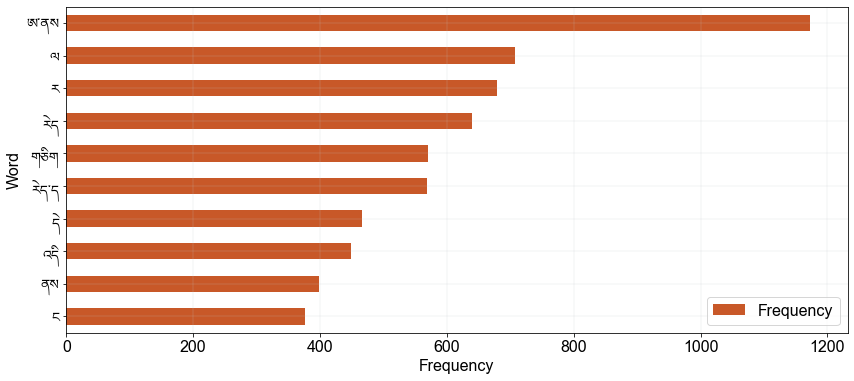

In [363]:
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams["font.size"] = 16 
    
ax=top_10.plot.barh(figsize=(14,6), color = '#c85828')
ax.set_yticklabels(labels = top_10.index, rotation = 0, font='Noto Sans Tibetan', fontsize='14') # defining font is required 
ax.set_xlabel("Frequency")
ax.grid(color="#c1c6ca",linewidth=0.2)
ax.invert_yaxis()

## 10 Calculating sentence complexity

Define a function, **words_per_sentence**, to calculate sentence complexity. This function will take a dictionary and calculate the average number of words for every *shad* ('།') punctuation mark. Run your function on the full corpus of children's speech to find the average words per sentence in common speech. (Round the result to the nearest tenths).

In [130]:
def words_per_sentence(dictionary):
    
    """ The words_per_sentence function takes a dictionary of word items
    and their frequencies — eg from freq_dict_dir — and returns a calculation
    of the average words per sentence of the corpus that dictionary represents"""
    
    no_shad = dictionary['།']
    no_words = sum(list(dictionary.values())) - no_shad
    sent_complex = no_words / no_shad
    return round(sent_complex,1)

words_per_sentence(freq_dict_spaced)

5.1

## 11 Defining a series of grade-level reference lists

Now that we have a general sense of the frequent vocabulary and words-per-sentence of Tibetan children's speech, let's define some grade-level reference lists. These word lists will be based on our speech word dictionary, which will help us define some basic vocab levels in accordance with international standard frameworks (eg, the <a href='https://vocabulary.one/en/important-facts'>CEFR</a>). 

Create a function that sorts a dictionary's values by frequency, and returns a level list of the top frequency words defined by that corpus's dictionary. Then, make frequency lists for A1 (defined as the top 500 words), A2 (1,000 words), and B1 (2,000 words). Include a list of common post-fixes in your function, and use them to do a rough lemmatization to make sure your lists include the common headword forms of frequent words. 

In [391]:
def freq_list_maker(dictionary,number): 
    
    """ freq_list_maker takes a frequency 'dictionary' and makes a list of the words that appear in the top
    frequency range of that dictionary the length of the 'number' defined by the user of the function ---
    for example, to make a list of the top 500 words of a corpus for defining A1 of a language domain"""
    
    sorted_values = sorted(freq_dict_spaced.values(),reverse=True)
    freq_list = []
    affixes = ['་པ','་ཡི','་བ','འི','་གི','་གྱི','་ཀྱི','་མ','་ད','་ར','་པའི','་བའི']
    
    # these affixes are a list of nominalizers and grammar particles; by identifying them, and adding the 'root'
    # word to our list, we're doing a kind of quick-and-dirty lemmitization (making our list more sensetive to 
    # the different forms of the 'same word' it will come across)
    
    for value in sorted_values:
        for key in dictionary: 
            if dictionary[key]==value and len(freq_list)<=number:
                if key not in freq_list:
                    freq_list.append(key)
    freq_list.pop(0) # remove the punctuation marker
    
    for word in freq_list:
        for affix in affixes:
            if word.endswith(affix)==True:
                freq_list.append(word.rstrip(affix))
                
    return freq_list


### 11.1 Notes on lists & lemmatization
Below, we run a request for the top 500 words and get a list of 594 words. This is because we added a kind of partial <a href='https://en.wikipedia.org/wiki/Lemmatisation'>'lemmatization'</a> of the affixes we defined in the function. If this section of the code is removed, we get 500 words. When we return the words the affix-finder finds, we note that it's working as intended! (Similar to finding and removing endings like '-ing' or '-ed' in a list of English words—for example, if 'finding' occurs in our corpus, we will also want the headword 'find' to appear on our list since it is, in effect, the "same word"). This will become important below, in section 8, where we analyze non-corpus data in comparison to these lists. 

In [392]:
A1_list = freq_list_maker(freq_dict_spaced,500)
print(len(A1_list)) # testing to make sure the length of the list is right
print(A1_list[0]) # testing to make sure the most frequent word is top of the list

594
ཨ་ནས


In [393]:
A2_list = freq_list_maker(freq_dict_spaced,1000)
len(A2_list)

1188

In [394]:
B1_list = freq_list_maker(freq_dict_spaced,2000)
len(B1_list)

2380

## 12 Analyzing a story's sentence complexity

In the following sections, we will take the reference data and functions we've worked on above and apply them to analyzing some stories written in Tibetan. We'll start with a Tibetan translation of a story called <a href="https://storyweaver.org.in/stories/98-rani-s-first-day-at-school">"Rani's first day of school"</a>. This story was written in a speech-like style, and translated from an English original. Later, we'll compare it to a more traditional literary-style Tibetan children's story, as well as a story transcribed directly from the natural speech of a Tibetan child.  

In the cell below, define a function below, **story_words_per_sentence**, that takes in a local txt file and returns the words-per-sentence calculation (above we wrote a similar function, **words_per_sentence**, for calculating the words-per-sentence of a reference corpus). Use the function to calculate the sentence complexity of our sample story, <a href="https://storyweaver.org.in/stories/98-rani-s-first-day-at-school">"Rani's first day of school"</a>. After calculating the story's difficulty, give some notes about how it compares to the children's speech reference corpus's calculation.

In [378]:
def story_words_per_sentence(story):
    
    """ takes a story from a given location and returns the words-per-sentence """
    
    story_text = local_raw_text(story)
    story_list_w_shad = story_text.split()
    story_list = [word for word in story_list_w_shad if word != "།"]
    total_shad = len(story_list_w_shad) - len(story_list)
    total_words = len(story_list)
    return round(total_words/total_shad,1)

story_words_per_sentence('D:\\UW-PHD\\2022-FALL-COMPSCI319\\p00\\story.txt') 

10.2

### 12.1 Notes on sentence complexity

Above, in section 5, we calculated the words-per-sentence as a stand-in for sentence complexity from our natural speech corpus. In that data, we counted **5.1 words per sentence**. In our story, we calculated **10.2 words per sentence**, or *double* the count found in children's speech. 

## 13 Analyzing a story's vocab readability percentage

Define a function, **story_percent_readable**, that takes a story from the local drive, compares it to a user-defined level list, and returns the percentage of the story that is expected to be readable given that reading level. Run it on the sample story, "Rani's first day of school", and see how well our writer did at making it readable for children (use B1_list, the 2,000-word vocab level). 

In [395]:
def story_percent_readable(story,level_list):
    
    """ takes a story from a given location and returns the percentage of vocab that is 
    'readable' according to the level provided """
    
    story_text = local_raw_text(story)
    story_list_w_shad = story_text.split()
    story_list = [word for word in story_list_w_shad if word != "།"]
    total_words = len(story_list)
    total_non_level = 0
    
    for word in story_list: 
        if word not in level_list:
            total_non_level += 1
    return round((100-((total_non_level/total_words)*100)),1)

story_percent_readable('D:\\UW-PHD\\2022-FALL-COMPSCI319\\p00\\story.txt',B1_list)

83.0

### 13.1 Notes on lemmatization's effect on this %

Lemmatization in the list-maker really improved things here. Before going back and implementing it, this function originally gave a readability score of only 69%. The lemmatization increased this score to 83%. This seems to be more accurate; specifically, it is closer to a secondary method I used to check this calculation: <a href='https://github.com/OpenPecha/dakje'>Dakje</a>, an automated readability editor, gives 87% on the same story (but with different frequency lists):

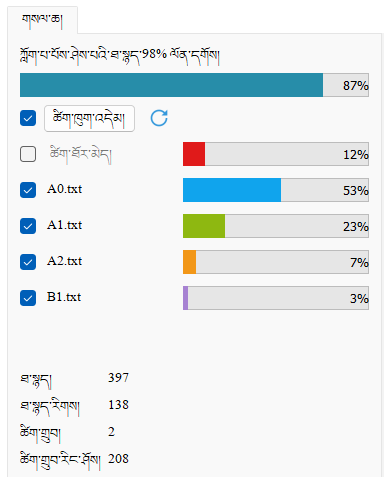

At this time, both methods are prone to errors. Both the simple lemmatization here, as well as the automated word tokenization in Dakje, make improper splits of Tibetan words. However, they also both provide a rough idea of a given text's difficulty for beginning readers, and they highlight a similar set of words as potentially difficult and unknown to beginning readers... 

## 14 Analyzing a story's non-level vocabulary 

Next, we will define a function to find that set of non-level words—the set of words that *don't* appear in our children's speech corpus. Use the variable **non_level_word_list** to define a function that takes a story from the local drive, compares it to a user-defined level list, and returns the a set of the words that don't appear in the lists. Remove duplicates from the list. 

This function will give us the words that appear in the children's story that are potential problem words—words that children may not know, given that they don't use them frequently in their natural speech. Run the function on our sample story, "Rani's first day of school", and comment on the results. 

In [396]:
def non_level_word_list(story,level_list):
    
    """ takes a story from a given location, compares it to a given level list, 
    and returns a list of unique words not found in the level """
    
    story_text = local_raw_text(story)
    story_list_w_shad = story_text.split()
    story_list = [word for word in story_list_w_shad if word != "།"]
    non_level_words = []
    
    for item in story_list: 
        if item not in level_list:
            non_level_words.append(item)
    return [*set(non_level_words)]

ranis_non_level_words = non_level_word_list('D:\\UW-PHD\\2022-FALL-COMPSCI319\\p00\\story.txt',B1_list)
ranis_non_level_words

['གོམ་པ',
 'ཆུང་རུ',
 'ངོ་མི་ཤེས་པ',
 'འཁོར་གསུམ',
 'རྒྱབ་ལོགས',
 'རྒྱ་སྒོ',
 'རེད་པས',
 'ཀྱི',
 'དགེ་ལགས',
 'ཡལ',
 'གཡས་གཡོན',
 'ཉིན',
 'དམ་པོ',
 'ཕྱིན་པའི',
 'རྐང་ག་རིལ',
 'འཇུ',
 'གཅིག་པུ',
 'སྣུམ་འཁོར',
 'རྒྱུག',
 'ཀྱིས',
 'ཀྱང',
 'ཕྱིན་པ',
 'ཨ་མའི',
 'སློབ་གྲྭའི',
 'རཱ་ནི',
 'གློད་པ',
 'སྤོ་བ',
 'རླངས་འཁོར',
 'སྤྱི་སྤྱོད',
 'གང་ཡིན་ཟེར་ན',
 'ཉིན་མ',
 'འཇུ་ཡི',
 'ཚོར་བ',
 'འཛུམ་མདངས',
 'གཡབ་གཡུག',
 'ཚར་བའི']

## 15 Checking the non-level word list 

Here, we can see the drawbacks of our partial lemmatization, which only works "one way". That is, our lists have been partially lemmatized, but our story has *not* been lemmatized. That means that potentially level-appropriate words that occur in our story, but have an affix (a nominalizer or a 'connecter' affix, for example), are not caught by our analysis. Two solutions that could be implemented would be to 'generate' the potential word forms on the list side, or to lemmatize on the story side. Both of these are beyond the scope of this small project. The first would require POS tagging (part of speech) to properly implement, and the second would require a more robust lemmatizer. 

Potentially level appropriate words (bolded affixes): 'ཆུང་**རུ**', 'ངོ་**མི**་ཤེས་པ', 'རེད་པ**ས**', 'ཕྱིན་པ**འི**', 'གཅིག་པུ', 'ཨ་མ**འི**', 'སློབ་གྲྭ**འི**', 'འཇུ་**ཡི**', 'ཚར་བ**འི**'

Let's check these words against our level list with a quick loop: 

In [397]:
affixes = ['་པ','་ཡི','་བ','འི','་གི','་གྱི','་ཀྱི','་མ','་ད','་ར','་པའི','་བའི']
for word in ranis_non_level_words: 
    for affix in affixes:
        if word.endswith(affix)==True:
            if word.rstrip(affix) not in B1_list:
                print(word.rstrip(affix))

གོམ
ངོ་མི་ཤེས
ཕྱིན་པ
སྤོ
ཉིན
འཇུ
ཚོར
ཚར་བ


### 15.1 Comments on the check
5 of these words are probably level-appropriate, they just don't happen to occur in our children's speech corpus (which isn't quite large enough). One has an internal affix, which would be good to code for in the future. And 3 are actually difficult words that the author should consider editing. 

## 16 Analyzing three versions of 'The Race'

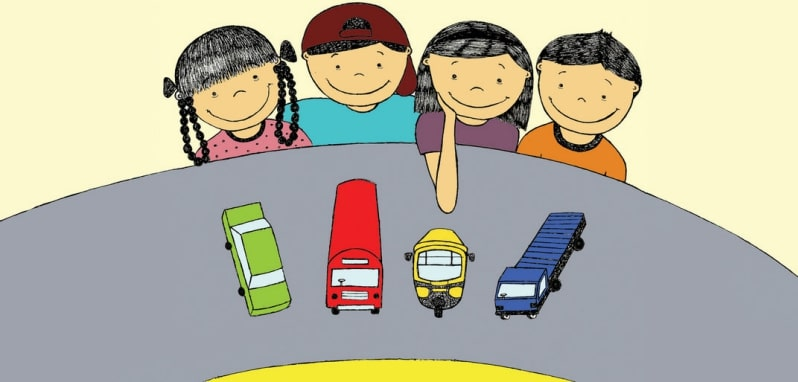

We have three different versions of the same short story called <a href='https://storyweaver.org.in/stories/108178-rgyug-shar-gran-sdur'>'The Race'</a>. One is a spoken version of a child telling the story based on the images; another is a vernacular version; and a third is a literary translation of the English original. 

### 16.1 Create a DataFrame 

Import the data from the directory the three versions of 'The Race' are stored in and calculate some basic readability data using the functions defined above (percent readability; words per sentence; and the number of non-level words). Create a Pandas DataFrame for the data you import, and order it by percent readability (the most readable version should come first). 

In [434]:
directory="D:\\UW-PHD\\2022-FALL-COMPSCI319\\p00\\stories"
data=[]

for file in os.listdir(directory):
    data.append([file, \
        story_percent_readable(directory + '\\' + file,B1_list), \
        story_words_per_sentence(directory + '\\' + file), \
        len(non_level_word_list(directory + '\\' + file,B1_list))])

data

df = pd.DataFrame(data, columns=['Name','Readability%','Words-per-sentence','Difficult-words'])\
.sort_values(by='Readability%',ascending=False)
df

,Name,Readability%,Words-per-sentence,Difficult-words
0,childrens-speech-story-sample.txt,77.1,4.1,12
2,vernacular-story-sample.txt,74.6,5.2,13
1,literary-story-sample.txt,58.6,5.4,23


## 17 Plotting the data from 'The Race'

Now plot the data in a scatterplot. Use "Readability %" as the x-axis, "words per sentence" as the y-axis, and set the size of the data points to indicate the number of difficult words. Below the graph, explain what the plot shows. 

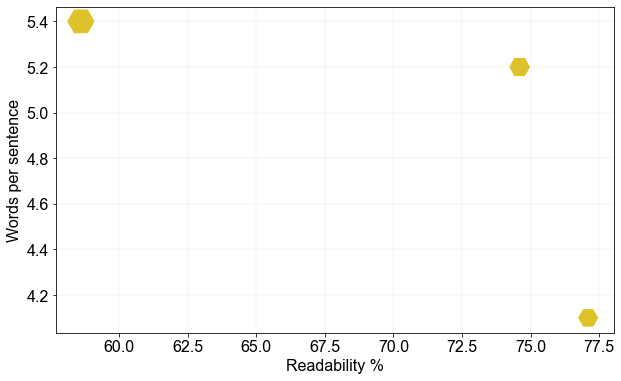

In [458]:
ax=df.plot.scatter(x='Readability%',y='Words-per-sentence', color='#ddc328',marker = "H",\
                   s=df['Difficult-words']*30,figsize=(10,6))
ax.set_xlabel('Readability %')
ax.set_ylabel('Words per sentence')
ax.grid(color="#c1c6ca",linewidth=0.2)

## 18 Comparing readability across publishers

Let's take our scatterplot and apply it to a broader range of data. In this section, we'll take a database of stories written by three different publishers of Tibetan children's literature that is available online: **TALI**, **DOE**, and **Manjushri**. <a href='https://talitibet.org/'>'TALI'</a> is the Tibetan Arts and Literature Initiative, a diaspora-based non-profit. The <a href='https://tibet.net/department/education/'>'DOE'</a> is the Department of Education, an India-based institution funded by the CTA, or Central Tibetan Administration. And <a href='https://www.facebook.com/manjushrieducation/'>'Manjushri'</a> is a new India-based non-profit. Both TALI and the DOE tend to create content from scratch, whereas the data from Manjushri is translated from children's literature originally written in English. 

Below, take the local directory of folders containing the text of the stories. Import it into Python, and run it through the functions we defined above to calculate its **readability %** and its **sentence complexity**. Store the data in a Pandas DataFrame, and sort the data by its readability%. 

### 17.1 Notes on the scatterplot 

We can clearly see the correlation between speech and speech-like writing (the two points on the right side of the graph), which both score higher on readability, and contain fewer non-level words. We also can see that both 'authored' texts have more sentence complexity—words-per-sentence is higher in writing than in speech. 

In [526]:
directory=['TALI','DOE','Manjushri']
data_publishers=[]

for publisher in directory:
    directory="D:\\UW-PHD\\2022-FALL-COMPSCI319\\p00\\"+publisher
    for file in os.listdir(directory):
        data_publishers.append([file, \
            story_percent_readable(directory + '\\' + file,B1_list), \
            story_words_per_sentence(directory + '\\' + file), \
            len(non_level_word_list(directory + '\\' + file,B1_list)),publisher])

df_publishers = pd.DataFrame(data_publishers, columns=['Name','Readability%',\
'Words-per-sentence','Difficult-words','Publisher'])\
.sort_values(by='Readability%',ascending=False)
df_publishers

,Name,Readability%,Words-per-sentence,Difficult-words,Publisher
22,Manjushri-7.txt,81.1,4.1,13,Manjushri
17,Manjushri-2.txt,79.7,8.6,21,Manjushri
5,DOE-2.txt,79.1,8.1,23,DOE
24,Manjushri-9.txt,72.9,11.8,44,Manjushri
21,Manjushri-6.txt,70.9,8.7,40,Manjushri
7,DOE-4.txt,70.0,8.4,38,DOE
23,Manjushri-8.txt,69.0,7.6,31,Manjushri
4,DOE-1.txt,68.8,7.5,69,DOE
8,DOE-5.txt,68.6,9.3,58,DOE
6,DOE-3.txt,68.5,9.3,35,DOE


## 19 Plotting the data by publisher

Now plot the data in a scatterplot. Use subplots to group the data by publisher. Give each publisher a unique color and symbol, and comment on the results below. 

In [527]:
publishers = list(set(df_publishers["Publisher"]))
publishers

['Manjushri', 'DOE', 'TALI']

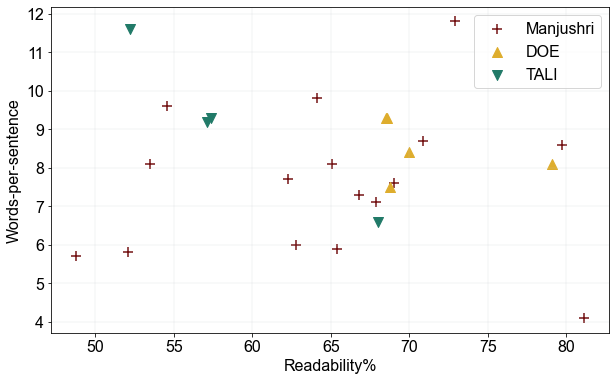

In [528]:
plot_area = None  
colors = ["#721011", "#dead2d", "#217a68"]
markers = ["+", "^", "v"]

for i in range(len(publishers)):
    publisher=publishers[i]
    publisher_df=df_publishers[df_publishers["Publisher"]==publisher]
    plot_area = publisher_df.plot.scatter(x = "Readability%", y = "Words-per-sentence", \
                            label = publisher, color = colors[i], marker = markers[i], ax = plot_area,\
                                         figsize=(10,6),s=100)

    plot_area.grid(color="#c1c6ca",linewidth=0.2)

### 19.1 Comments on the scatterplot

All the stories have a relatively similar words-per-sentence—generally between 5–12. According to the plot, it appears that the Tibetan DOE is more successful at writing readable content than TALI (who scores below 60% in readability in all but one story). And while we might expect Manjushri's graded Tibetan literature that is based on graded English literature to be 'automatically' graded when translated, that doesn't appear to be the case: Manjushri's plots show the widest range of readability in terms of vocabulary, as well as sentence complexity. This may point to the fact that they use many different authors to produce content, and perhaps, that they employ very little oversight on the content they produce. 